<a href="https://colab.research.google.com/github/tylee33/DLforFinance/blob/master/Stocker_Analysis_Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Command for plotting in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
    name = fn, length = len(uploaded[fn])))

In [0]:
!pip install quandl

     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 61kB 19.1MB/s 
     |████████████████████████████████| 2.3MB 8.4MB/s 
     |████████████████████████████████| 102kB 23.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: more-itertools 7.0.0
    Uninstalling more-itertools-7.0.0:
      Successfully uninstalled more-itertools-7.0.0


In [5]:
!pip install pytrends

In [0]:
from stocker import Stocker

In [8]:
microsoft = Stocker('MSFT')

MSFT Stocker Initialized. Data covers 1986-03-13 00:00:00 to 2018-03-27 00:00:00.


In [9]:
stock_history = microsoft.stock
stock_history.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09,1986-03-13,0.064720,0.005779
1,1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08,1986-03-14,0.067031,0.002311
2,1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08,1986-03-17,0.068187,0.001156
3,1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07,1986-03-18,0.066454,-0.001734
4,1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07,1986-03-19,0.065298,-0.001156


Maximum Adj. Close = 96.77 on 2018-03-12 00:00:00.
Minimum Adj. Close = 0.06 on 1986-03-24 00:00:00.
Current Adj. Close = 89.47 on 2018-03-27 00:00:00.



/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


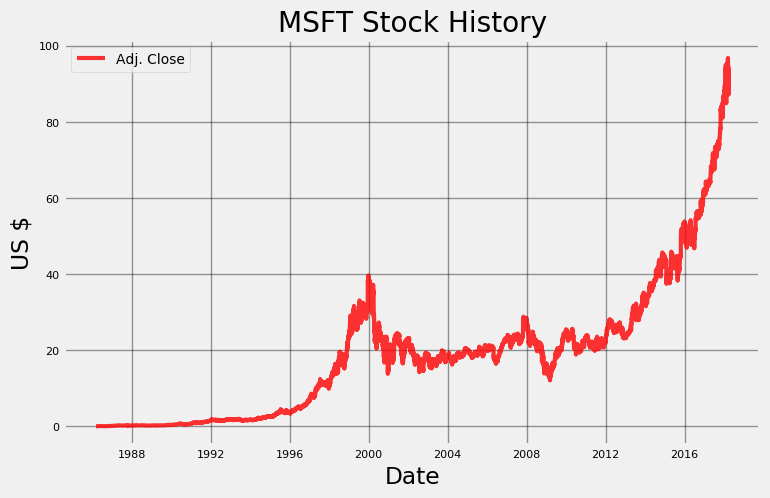

In [10]:
microsoft.plot_stock()

Maximum Daily Change = 2.08 on 2008-10-13 00:00:00.
Minimum Daily Change = -3.34 on 2017-12-04 00:00:00.
Current Daily Change = -5.47 on 2018-03-27 00:00:00.

Maximum Adj. Volume = 591052200.00 on 2006-04-28 00:00:00.
Minimum Adj. Volume = 7425503.00 on 2017-11-24 00:00:00.
Current Adj. Volume = 53704562.00 on 2018-03-27 00:00:00.



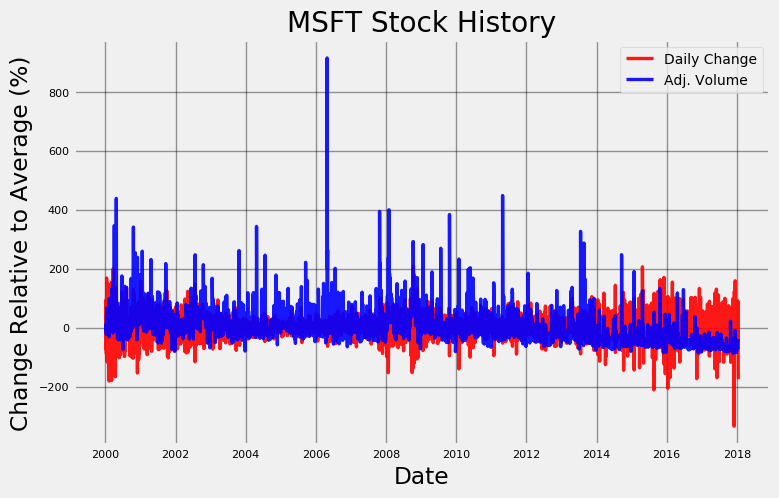

In [11]:
microsoft.plot_stock(start_date = '2000-01-03', end_date = '2018-01-16', 
                     stats = ['Daily Change', 'Adj. Volume'], plot_type='pct')

# **Potential Profit**

MSFT Total buy and hold profit from 1986-03-13 00:00:00 to 2018-01-16 00:00:00 for 100 shares = $8829.11


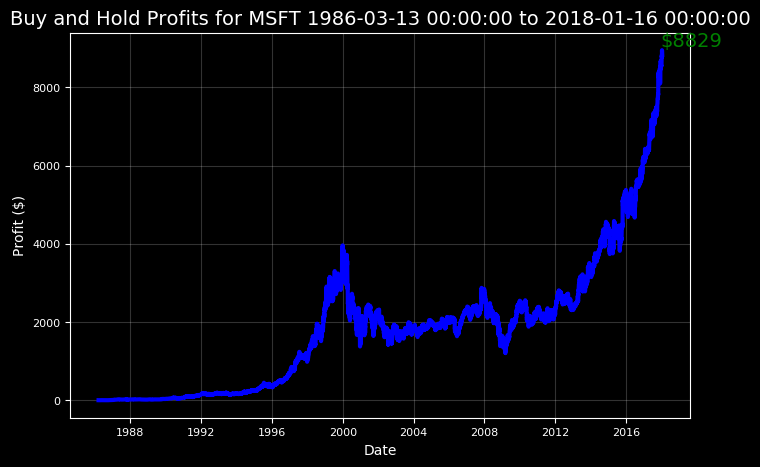

In [15]:
microsoft.buy_and_hold(start_date='1986-03-13', end_date='2018-01-16', nshares=100)

MSFT Total buy and hold profit from 1999-01-05 00:00:00 to 2002-01-03 00:00:00 for 100 shares = $-56.92


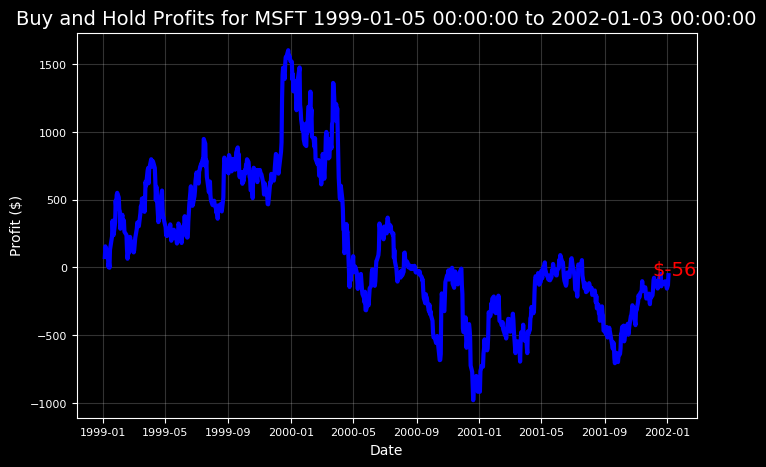

In [16]:
microsoft.buy_and_hold(start_date='1999-01-05', end_date='2002-01-03', nshares=100)

# Trends and **Patterns**

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


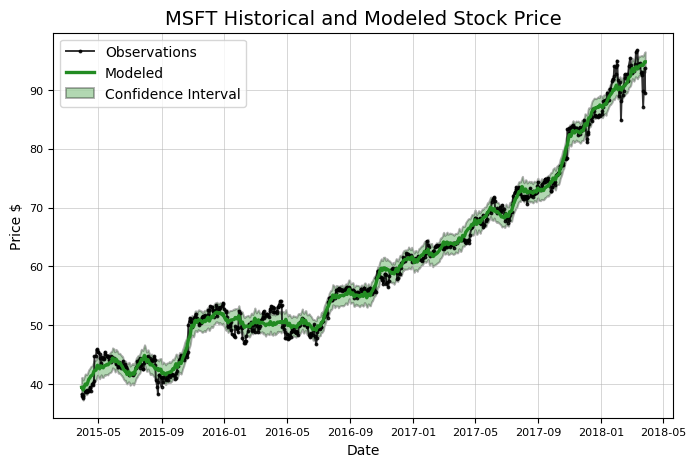

In [17]:
model, model_data = microsoft.create_prophet_model()

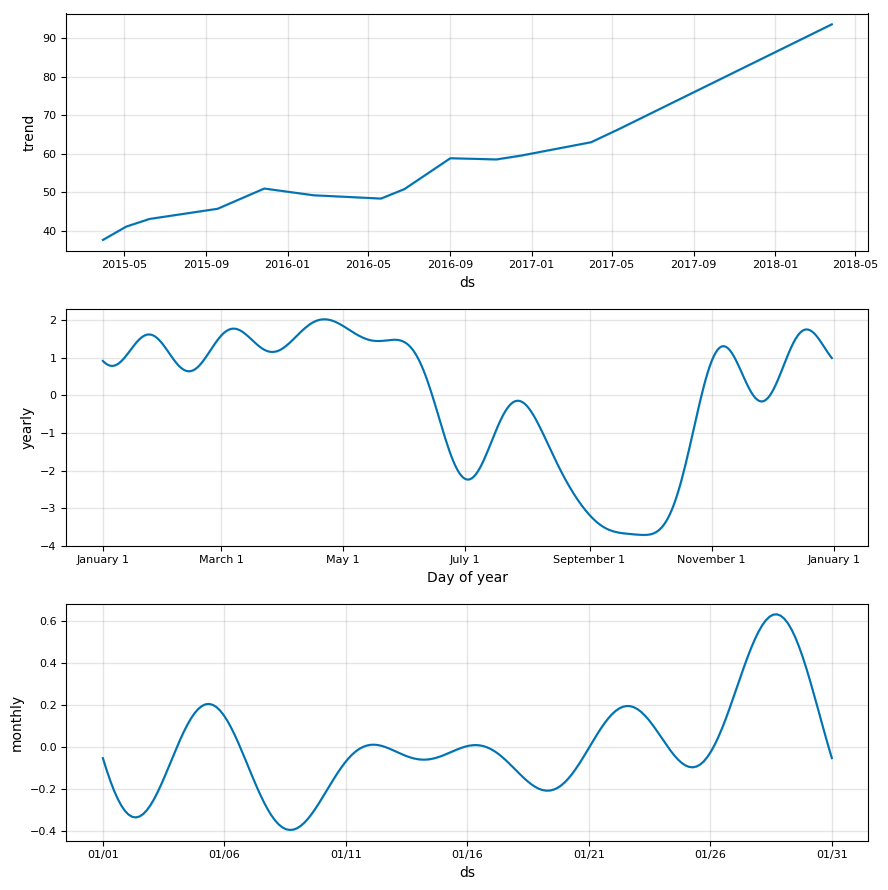

In [18]:
model.plot_components(model_data)
plt.show()

In [19]:
print(microsoft.weekly_seasonality)
microsoft.weekly_seasonality = True
print(microsoft.weekly_seasonality)

False
True


/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


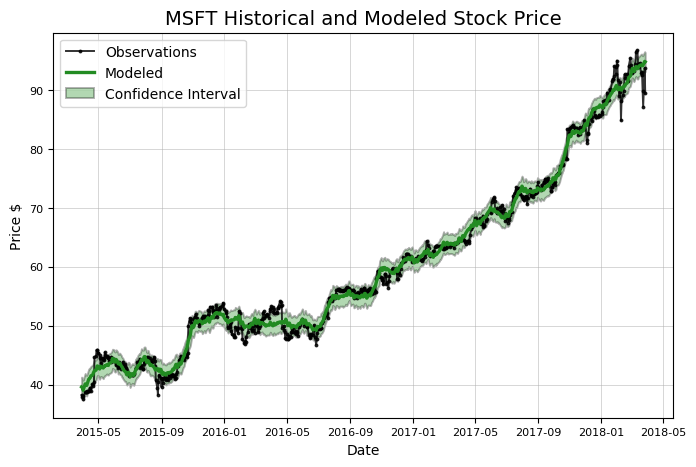

In [20]:
model, model_data = microsoft.create_prophet_model(days=0)

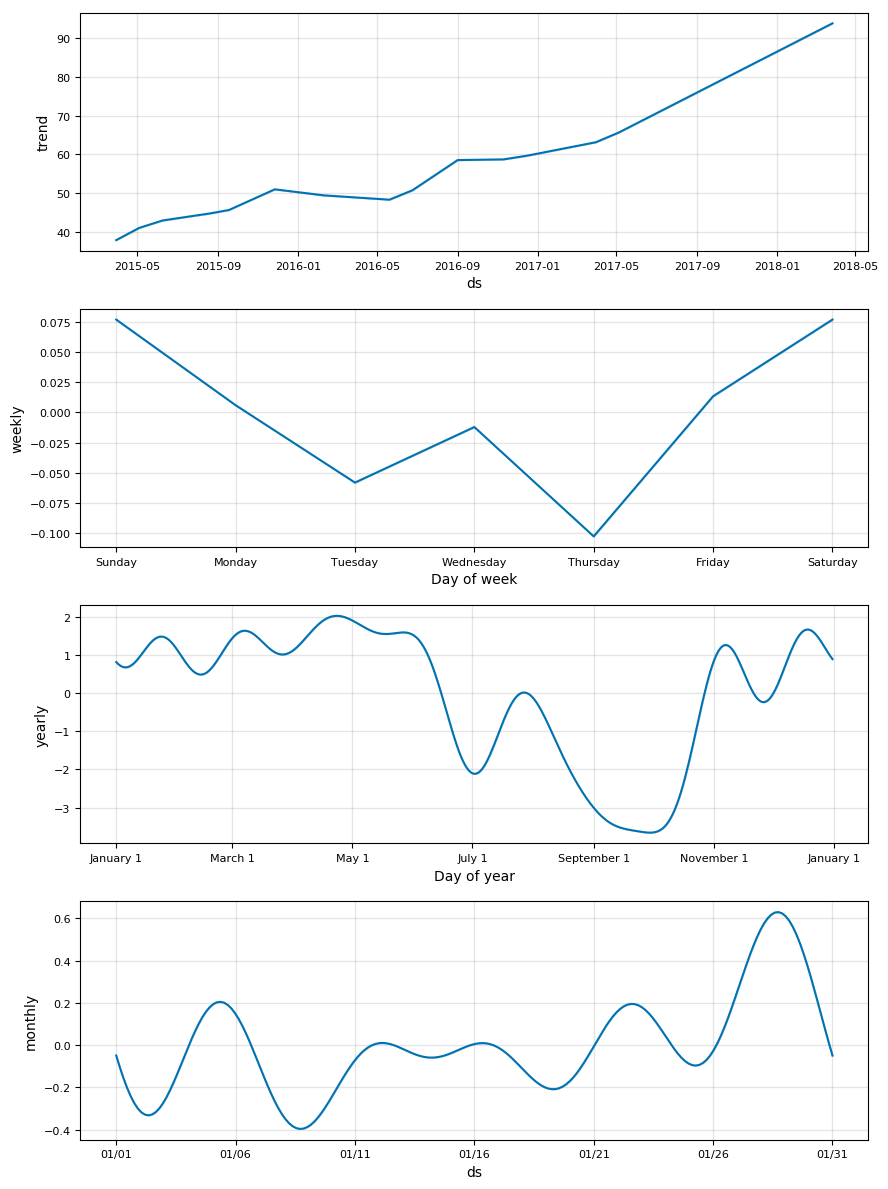

In [21]:
model.plot_components(model_data)
plt.show()

In [0]:
# Turn off the weekly seasonality because it clearly did not work! 
microsoft.weekly_seasonality=False

# **Changepoints**

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()



Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
361 2016-09-01   55.966886 -1.363753
169 2015-11-27   51.353167 -1.115812
289 2016-05-20   48.886934  0.884024
120 2015-09-18   41.122995  0.554914
506 2017-03-31   64.816957  0.540252


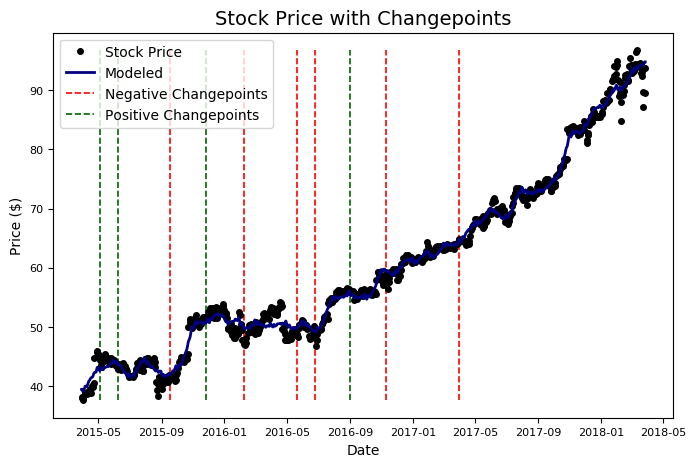

In [23]:
microsoft.changepoint_date_analysis()

# **Predictions**

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


Predicted Price on 2018-09-23 00:00:00 = $105.09


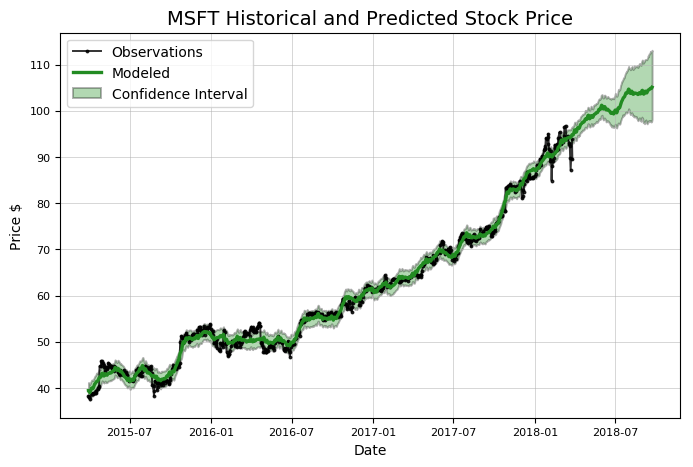

In [27]:
model, future = microsoft.create_prophet_model(days=180)